<a href="https://colab.research.google.com/github/alezmartineza/Experimentos-Python/blob/main/Caso_ML_Maestria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset cargado correctamente

(1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  Sale

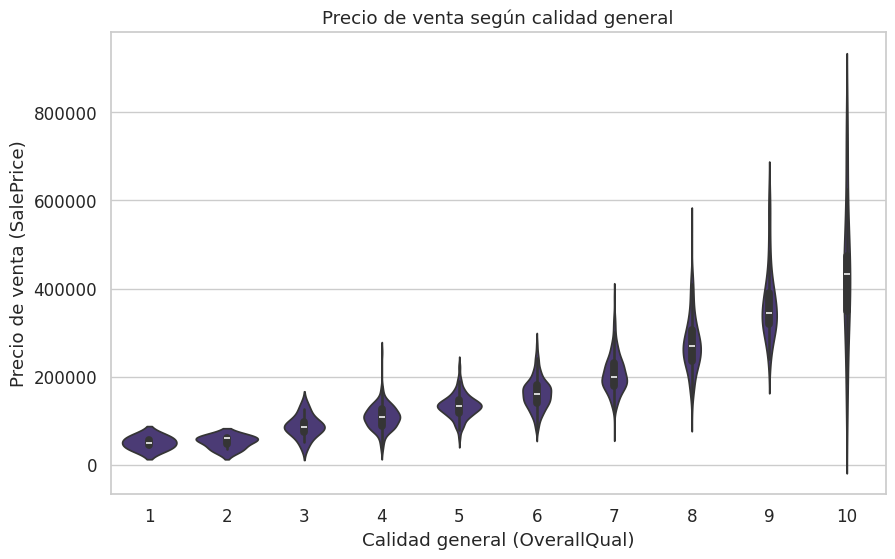

📈 Correlación entre calidad general y precio: 0.79
➡️ Fuerte relación positiva: la calidad influye directamente en el precio.

📊 Pregunta 2: ¿Influye la calidad del garaje (GarageQual) en el precio promedio?


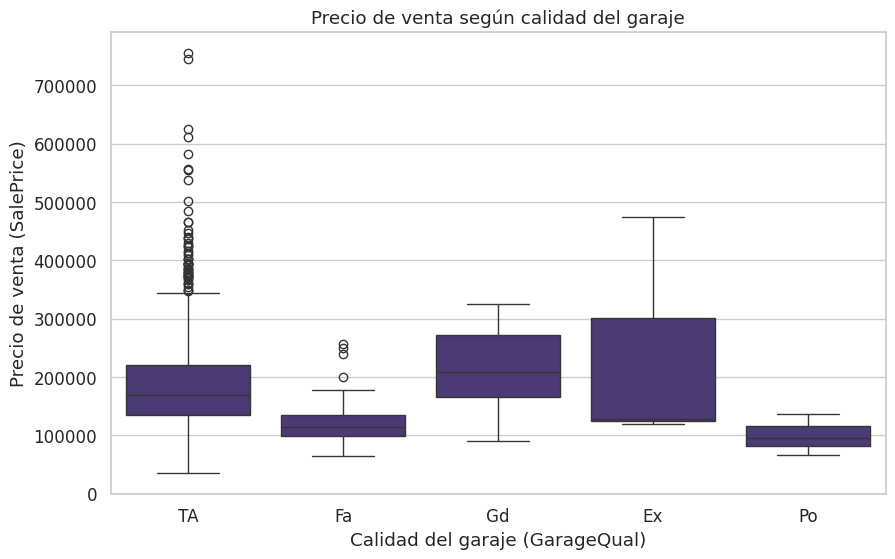

🔬 Resultado ANOVA: F=9.57, p-value=0.0000
➡️ Diferencias estadísticamente significativas entre las categorías de GarageQual.

📊 Pregunta 3: ¿Cuál es el promedio de área del terreno según el tipo de zona (MSZoning)?


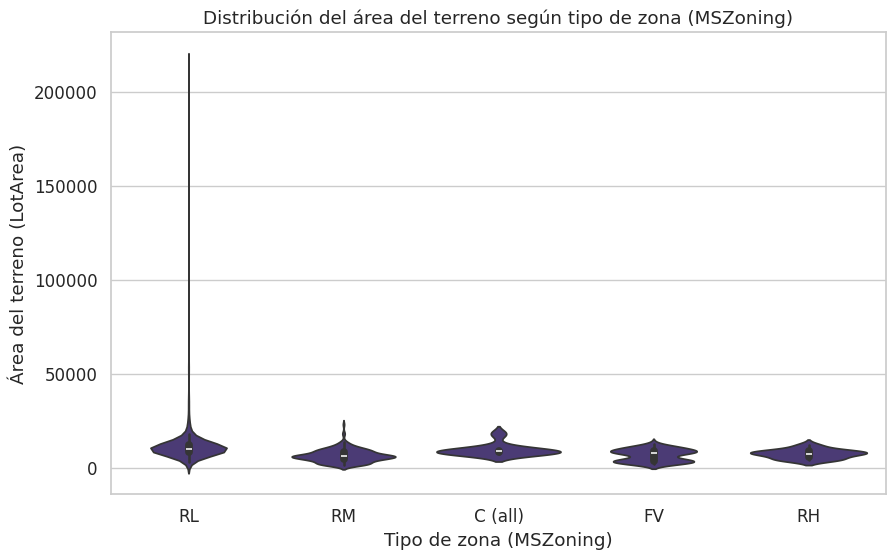

🔬 Resultado ANOVA: F=16.09, p-value=0.0000
➡️ Diferencias significativas en el tamaño del lote entre zonas.

📊 Pregunta 4: ¿Qué materiales predominan en las casas más caras?


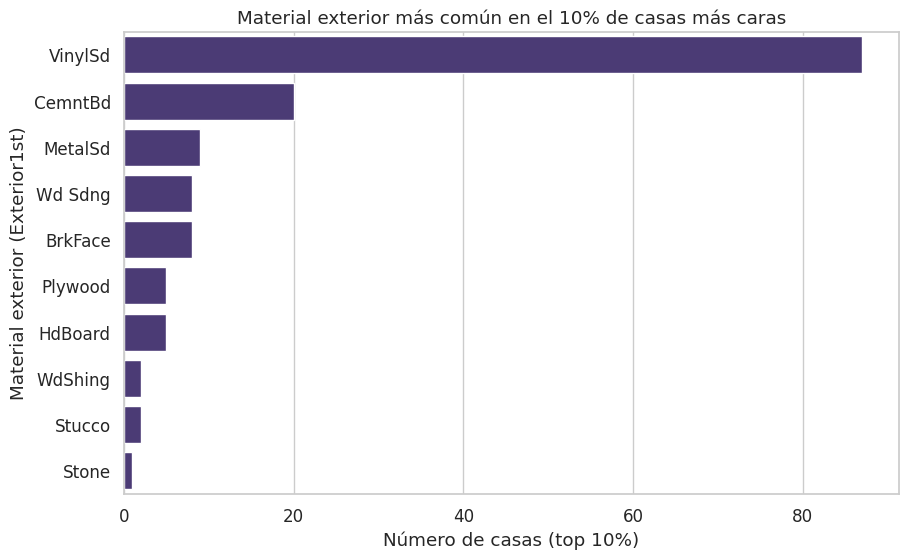

➡️ Los materiales más frecuentes en las casas más caras suelen ser de alta calidad (BrickFace, CementBd, VinylSd).

📊 Pregunta 5: ¿Existe correlación entre área habitable (GrLivArea) y precio?


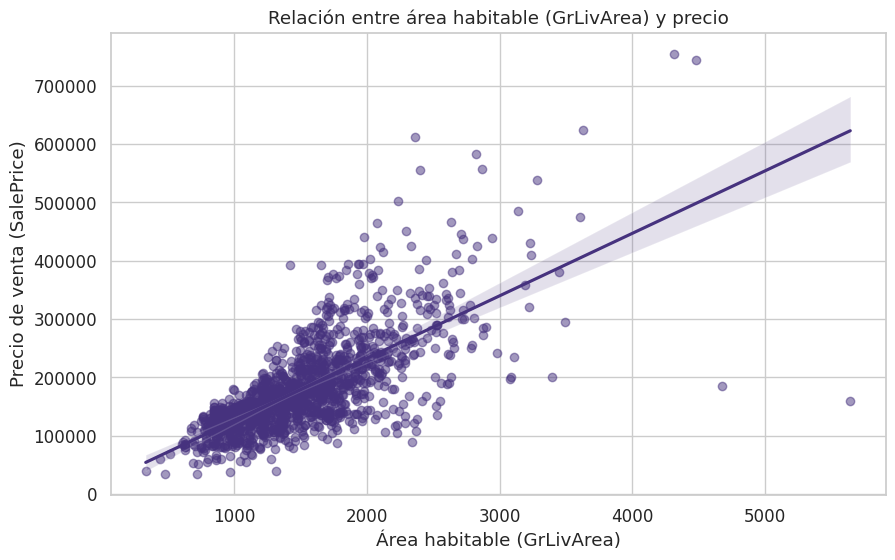

📈 Correlación entre área habitable y precio: 0.71
➡️ Fuerte relación positiva: el tamaño habitable explica gran parte del precio.

📋 Conclusiones:
- La calidad general (OverallQual) y el tamaño habitable (GrLivArea) son las variables más correlacionadas con el precio.
- La ubicación (MSZoning) también influye en el tamaño del lote y, por tanto, en el valor total.
- La calidad del garaje y los materiales exteriores distinguen viviendas de gama alta.
- En conjunto, calidad y ubicación pesan más que la antigüedad en la determinación del precio.

✅ Análisis completo finalizado.


In [2]:
# ==========================================================
# 🏠 Análisis de Datos - Ames Housing Dataset
# Autor: [Tu nombre]
# ==========================================================

# 📦 1. Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Configuración visual
sns.set(style="whitegrid", palette="viridis", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10, 6)

# 📂 2. Cargar dataset
df = pd.read_csv("/train.csv")  # Ajusta la ruta si es necesario
print("✅ Dataset cargado correctamente\n")
print(df.shape)
print(df.head())

# ==========================================================
# 💰 SECCIÓN 1: Precio y calidad general
# ==========================================================

print("\n📊 Pregunta 1: ¿Cómo varía el precio promedio según la calidad general (OverallQual)?")

sns.violinplot(data=df, x="OverallQual", y="SalePrice")
plt.title("Precio de venta según calidad general")
plt.xlabel("Calidad general (OverallQual)")
plt.ylabel("Precio de venta (SalePrice)")
plt.show()

corr_qual = df["OverallQual"].corr(df["SalePrice"])
print(f"📈 Correlación entre calidad general y precio: {corr_qual:.2f}")
if corr_qual > 0.7:
    print("➡️ Fuerte relación positiva: la calidad influye directamente en el precio.\n")
else:
    print("➡️ Relación moderada o débil.\n")

# ==========================================================
# 🚗 SECCIÓN 2: Calidad del garaje y precio
# ==========================================================

print("📊 Pregunta 2: ¿Influye la calidad del garaje (GarageQual) en el precio promedio?")

sns.boxplot(data=df, x="GarageQual", y="SalePrice")
plt.title("Precio de venta según calidad del garaje")
plt.xlabel("Calidad del garaje (GarageQual)")
plt.ylabel("Precio de venta (SalePrice)")
plt.show()

# ANOVA: diferencias de medias entre grupos
anova_garage = stats.f_oneway(
    *[df.loc[df["GarageQual"] == g, "SalePrice"].dropna() for g in df["GarageQual"].dropna().unique()]
)
print(f"🔬 Resultado ANOVA: F={anova_garage.statistic:.2f}, p-value={anova_garage.pvalue:.4f}")
if anova_garage.pvalue < 0.05:
    print("➡️ Diferencias estadísticamente significativas entre las categorías de GarageQual.\n")
else:
    print("➡️ No se encontraron diferencias significativas.\n")

# ==========================================================
# 🏡 SECCIÓN 3: Área del terreno y tipo de zona
# ==========================================================

print("📊 Pregunta 3: ¿Cuál es el promedio de área del terreno según el tipo de zona (MSZoning)?")

sns.violinplot(data=df, x="MSZoning", y="LotArea")
plt.title("Distribución del área del terreno según tipo de zona (MSZoning)")
plt.xlabel("Tipo de zona (MSZoning)")
plt.ylabel("Área del terreno (LotArea)")
plt.show()

anova_zone = stats.f_oneway(
    *[df.loc[df["MSZoning"] == z, "LotArea"].dropna() for z in df["MSZoning"].dropna().unique()]
)
print(f"🔬 Resultado ANOVA: F={anova_zone.statistic:.2f}, p-value={anova_zone.pvalue:.4f}")
if anova_zone.pvalue < 0.05:
    print("➡️ Diferencias significativas en el tamaño del lote entre zonas.\n")
else:
    print("➡️ No se detectan diferencias relevantes.\n")

# ==========================================================
# 🧱 SECCIÓN 4: Material exterior en casas más caras
# ==========================================================

print("📊 Pregunta 4: ¿Qué materiales predominan en las casas más caras?")

# Filtrar top 10% de precios
top_10 = df[df["SalePrice"] >= df["SalePrice"].quantile(0.90)]

material_counts = top_10["Exterior1st"].value_counts().head(10)
sns.barplot(x=material_counts.values, y=material_counts.index)
plt.title("Material exterior más común en el 10% de casas más caras")
plt.xlabel("Número de casas (top 10%)")
plt.ylabel("Material exterior (Exterior1st)")
plt.show()

print("➡️ Los materiales más frecuentes en las casas más caras suelen ser de alta calidad (BrickFace, CementBd, VinylSd).\n")

# ==========================================================
# 📈 SECCIÓN 5: Área habitable vs precio
# ==========================================================

print("📊 Pregunta 5: ¿Existe correlación entre área habitable (GrLivArea) y precio?")

sns.regplot(data=df, x="GrLivArea", y="SalePrice", scatter_kws={'alpha':0.5})
plt.title("Relación entre área habitable (GrLivArea) y precio")
plt.xlabel("Área habitable (GrLivArea)")
plt.ylabel("Precio de venta (SalePrice)")
plt.show()

corr_area = df["GrLivArea"].corr(df["SalePrice"])
print(f"📈 Correlación entre área habitable y precio: {corr_area:.2f}")
if corr_area > 0.7:
    print("➡️ Fuerte relación positiva: el tamaño habitable explica gran parte del precio.\n")
else:
    print("➡️ Relación moderada o débil.\n")

# ==========================================================
# 📊 Conclusiones generales
# ==========================================================

print("📋 Conclusiones:")
print("- La calidad general (OverallQual) y el tamaño habitable (GrLivArea) son las variables más correlacionadas con el precio.")
print("- La ubicación (MSZoning) también influye en el tamaño del lote y, por tanto, en el valor total.")
print("- La calidad del garaje y los materiales exteriores distinguen viviendas de gama alta.")
print("- En conjunto, calidad y ubicación pesan más que la antigüedad en la determinación del precio.\n")
print("✅ Análisis completo finalizado.")